In [2]:
%matplotlib inline


# Lanl Routes


Routes to LANL from 186 sites on the Internet.

This uses Graphviz for layout so you need PyGraphviz or pydot.




graph has 1281 nodes with 1296 edges
1 connected components


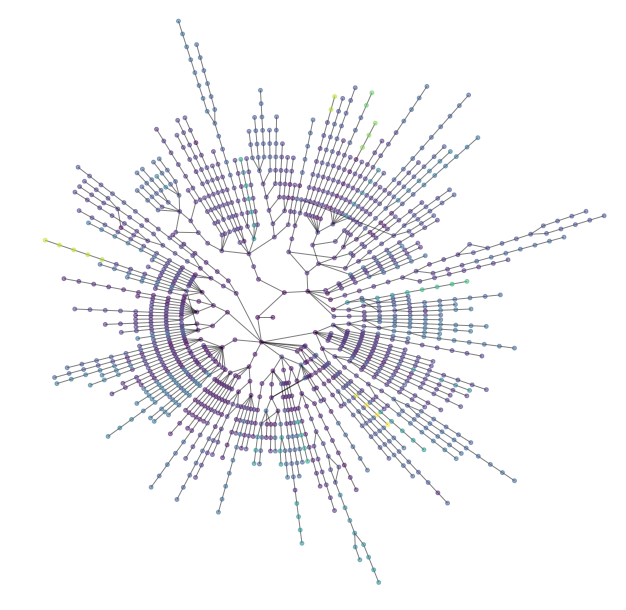

In [3]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2018
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.


import matplotlib.pyplot as plt
import networkx as nx
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

def lanl_graph():
    """ Return the lanl internet view graph from lanl.edges
    """
    try:
        fh = open('lanl_routes.edgelist', 'r')
    except IOError:
        print("lanl.edges not found")
        raise

    G = nx.Graph()

    time = {}
    time[0] = 0  # assign 0 to center node
    for line in fh.readlines():
        (head, tail, rtt) = line.split()
        G.add_edge(int(head), int(tail))
        time[int(head)] = float(rtt)

    # get largest component and assign ping times to G0time dictionary
    G0 = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    G0.rtt = {}
    for n in G0:
        G0.rtt[n] = time[n]

    return G0


if __name__ == '__main__':

    G = lanl_graph()

    print("graph has %d nodes with %d edges"
          % (nx.number_of_nodes(G), nx.number_of_edges(G)))
    print(nx.number_connected_components(G), "connected components")

    plt.figure(figsize=(8, 8))
    # use graphviz to find radial layout
    pos = graphviz_layout(G, prog="twopi", root=0)
    # draw nodes, coloring by rtt ping time
    nx.draw(G, pos,
            node_color=[G.rtt[v] for v in G],
            with_labels=False,
            alpha=0.5,
            node_size=15)
    # adjust the plot limits
    xmax = 1.02 * max(xx for xx, yy in pos.values())
    ymax = 1.02 * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.show()